## CIFAR10のデータ拡張のサンプルコード
さまざまなデータ拡張を試してみましょう
### 使い方
1. [ファイル] > [ドライブにコピーを保存] > [新しいタブを開く]
2. 「Cifar_transform_display.ipynb のコピー」のタイトルを変更変更
3. 名前を変更したファイルで作業を行う


In [6]:
# 必要なものをインポート
import os
from torchvision import transforms
from torchvision.datasets import CIFAR10
from torchvision.utils import make_grid
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
%matplotlib inline

Files already downloaded and verified
torch.Size([3, 32, 32])


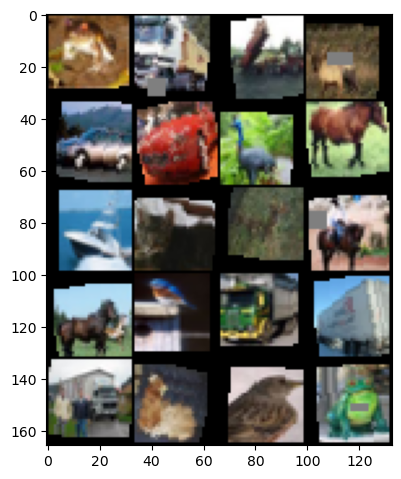

In [7]:


def load_cifar10(transform, train:bool):
    cifar10_dataset = CIFAR10(
                        root='./data',
                        train=train,
                        download=True,
                        transform=transform
                        )
    return cifar10_dataset

def sample_show(dataset):
    loader = DataLoader(
        dataset, batch_size=20, shuffle=False, 
        num_workers=os.cpu_count(), drop_last=False) # 20
    sample_cifar10, _ = next(iter(loader))
    print(sample_cifar10[0].shape)
    grid = make_grid(sample_cifar10, nrow=4, padding=1, normalize=True)
    fig = plt.figure(figsize=(12.8, 5.6))
    fig.tight_layout()
    plt.imshow(grid.numpy().transpose(1,2,0))
    # 保存する際は以下を実行
    # plt.savefig("sample_cifar_transform.png")

"""ここでデータ拡張を設定する"""
def set_transform():
    transform = transforms.Compose([
        transforms.RandomHorizontalFlip(p=0.5),
        #transforms.RandomVerticalFlip(p=0.5), #画像水平反転
        transforms.RandomRotation(degrees=(-15,15)), #画像垂直反転
        transforms.RandomCrop(32, padding=4), #画像を切り抜き

        #transforms.GaussianBlur(kernel_size=15),
        #transforms.RandomPosterize(bits=1, p=1.0),
        #transforms.RandomAdjustSharpness(p=1.0, sharpness_factor=3),
                            
        transforms.ToTensor(),
        transforms.Normalize( (0.5, 0.5, 0.5), (0.5, 0.5, 0.5) ),
        transforms.RandomErasing(p=0.5, scale=(0.02, 0.1), ratio=(0.3, 3.3), value=0), #画像の一部を塗りつぶす
    ])
    return transform
    train_transform = transforms.Compose([
                            # transforms.RandomHorizontalFlip(p=0.5), #画像を左右反転
                            # transforms.RandomVerticalFlip(p=0.5), #画像を垂直反転
                            # transforms.RandomRotation(degrees=30),#画像を回転
                            transforms.ToTensor(),
                            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                            #transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0) #画像を切り抜き
    ])

# cifar10のデータセットをロードし使える状態にする
dataset = load_cifar10(transform=set_transform(), train=True)
# 関数を実行し，データ整形の結果を表示
sample_show(dataset)